**Nombre:** Edi Yovani Tomas Reynoso

**Carnet:**  201503783

**Primer Problema**




/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


[[ 33.19398054 -26.71856866]
 [  9.97178975  33.68931951]
 [-12.73432033  -9.74379705]
 [-30.43144997   2.7730462 ]]


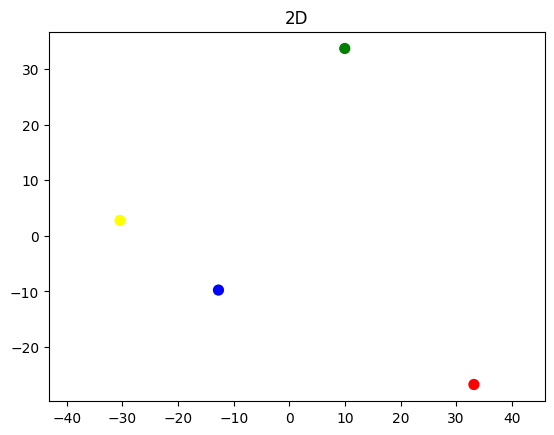

In [1]:
import numpy as np
from sklearn.manifold import MDS
from matplotlib import pyplot as plt


Voltaje = [3.7,3.7,3.7,3.7]
Amperaje = [35, 30, 20, 15]
Resistencia = [0.33,0.15,0.15,0.16]
Potencia = [80,60,60,40]
Ah_x_hrs = [4,3.5,3,2]
puff_x_battery = [217,197,240,240]
puff_x_eliquid = [139,197,176,186]
modelo  = ['a', 'b', 'c', 'd']

Tuplas=list(zip(Voltaje,Amperaje,Resistencia,Potencia,Ah_x_hrs, puff_x_battery,puff_x_eliquid))

mds = MDS(random_state=0)
X_transform = mds.fit_transform(Tuplas)
print(X_transform)


colors = np.array(["red","green","blue","yellow"])

size = [50, 50, 50, 50]
plt.axis('equal')
plt.scatter(X_transform[:,0], X_transform[:,1], s=size, c=colors)
plt.title('2D')
plt.show()

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,  random_state=0)
kmeans.fit(Tuplas)
print(kmeans.cluster_centers_)
print(kmeans.labels_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[3.70e+00 3.50e+01 3.30e-01 8.00e+01 4.00e+00 2.17e+02 1.39e+02]
 [3.70e+00 1.75e+01 1.55e-01 5.00e+01 2.50e+00 2.40e+02 1.81e+02]
 [3.70e+00 3.00e+01 1.50e-01 6.00e+01 3.50e+00 1.97e+02 1.97e+02]]
[0 2 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


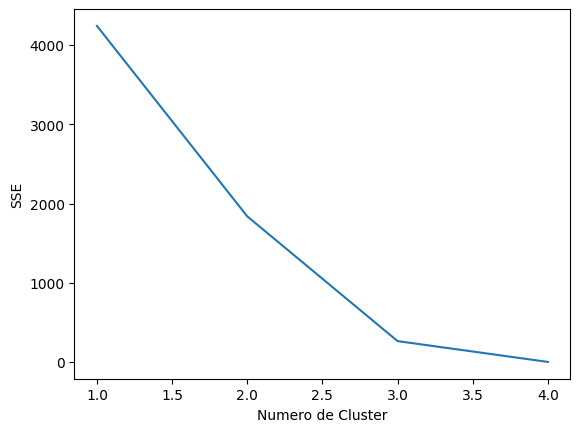

For c=2, The Silhouette Coef is 0.24431150148223235
For c=3, The Silhouette Coef is 0.27021733801065395


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
from sklearn.metrics import silhouette_score

sse = {}
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(Tuplas)
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Numero de Cluster")
plt.ylabel("SSE")
plt.show()

for n_cluster in range(2, 4):
    kmeans = KMeans(n_clusters=n_cluster).fit(Tuplas)
    label = kmeans.labels_
    sil_coeff = silhouette_score(Tuplas, label)
    print("For c={}, The Silhouette Coef is {}".format(n_cluster, sil_coeff))


[[ 33.19398054 -26.71856866]
 [-21.58288515  -3.48537542]
 [  9.97178975  33.68931951]]
[0 2 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


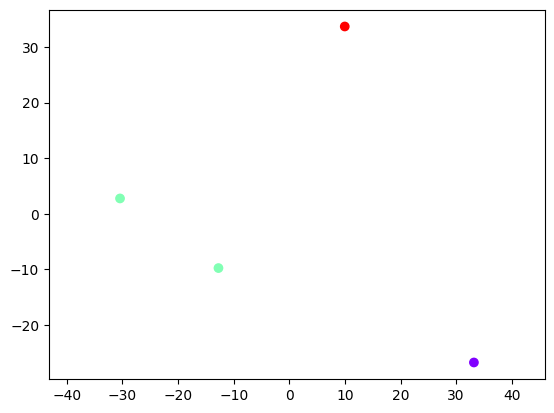

In [4]:
kmeans2D = KMeans(n_clusters=3, random_state=0)
kmeans2D.fit(X_transform)
print(kmeans2D.cluster_centers_)
print(kmeans2D.labels_)
plt.axis('equal')
plt.scatter(X_transform[:,0],
            X_transform[:,1], 
            c=kmeans2D.labels_, 
            cmap='rainbow',)

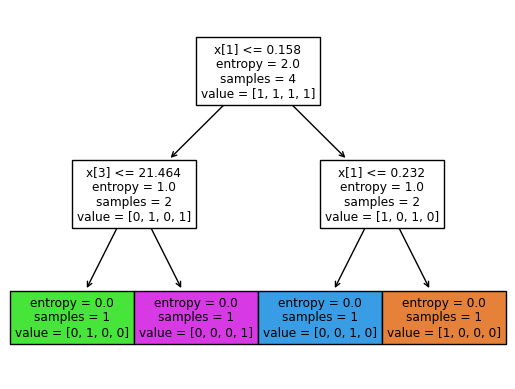

[139]
[186]
[139]


In [15]:
#puff per eliquid
from sklearn.tree import DecisionTreeClassifier, plot_tree

#p = [140, 197, 176, 186]
 
#Potencia = [80,60,60,40]
#Resistencia = [0.33,0.15,0.15,0.16]
#Voltaje = [3.7,3.7,3.7,3.7]
#Amperaje = [35, 30, 20, 15]

#Ah_x_hrs = [4,3.5,3,2]
#puff_x_battery = [217,197,240,240]
#puff_x_eliquid = [139,197,176,186]

features=list(zip(Potencia, Resistencia, Voltaje, Amperaje))
clf = DecisionTreeClassifier(criterion='entropy', 
                             random_state=0, 
                             splitter='random').fit(features, puff_x_eliquid)
plot_tree(clf, filled=True)
plt.show()
x = np.array([40, 0.6, 3.7, 20]).reshape(1, -1)
print(clf.predict(x))
x = np.array([60, 0.2, 3.7, 20]).reshape(1, -1)
print(clf.predict(x))
x = np.array([50, 0.6, 3.7, 20]).reshape(1, -1)
print(clf.predict(x))

In [16]:
#puff_x_eliquid

from sklearn.ensemble import RandomForestRegressor



regressor = RandomForestRegressor(random_state=0)
regressor.fit(features, puff_x_eliquid)
print(regressor.predict(features))





[158.9  187.46 181.87 184.71]


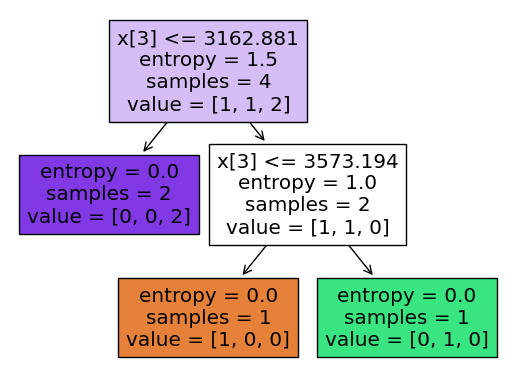

[214]
[240]
[240]


In [10]:




ah = [4000, 3500, 3000, 2000]
pb = [214, 197, 240, 240]

[60 0.2 3.7 20]
#w = [80, 60, 60, 40]
#o = [0.33, 0.15, 0.15, 0.16]
#v = [3.7, 3.7, 3.7, 3.7]
#a = [35, 30, 20, 15]
#p = [140, 197, 176, 186]

P=[60, 0.2, 3.7, 3000]

#features=list(zip(w, o, v, a))
features=list(zip(Potencia, Resistencia, Voltaje, ah))
clf = DecisionTreeClassifier(criterion='entropy', 
                             random_state=0, 
                             splitter='random').fit(features, pb)
plot_tree(clf, filled=True)
plt.show()
x = np.array([75, 0.15, 3.7, 4000]).reshape(1, -1)
print(clf.predict(x))
x = np.array([60, 0.2, 3.7, 3000]).reshape(1, -1)
print(clf.predict(x))
x = np.array([40, 0.6, 3.7, 2000]).reshape(1, -1)
print(clf.predict(x))

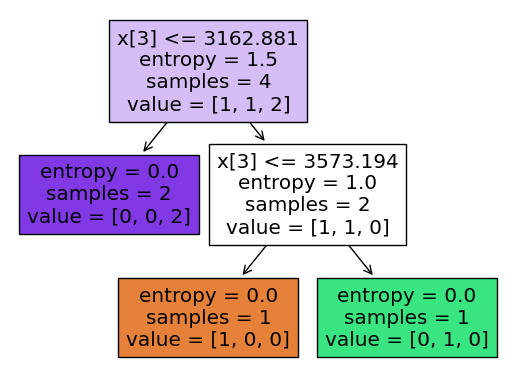

[214]
[240]
[240]


In [11]:
#puff per battery

ah = [4000, 3500, 3000, 2000]
pb = [214, 197, 240, 240]

features=list(zip(Potencia, Resistencia, Voltaje, ah))

clf = DecisionTreeClassifier(criterion='entropy', 
                             random_state=0, 
                             splitter='random').fit(features, pb)
plot_tree(clf, filled=True)
plt.show()
x = np.array([75, 0.15, 3.7, 4000]).reshape(1, -1)
print(clf.predict(x))
x = np.array([60, 0.2, 3.7, 3000]).reshape(1, -1)
print(clf.predict(x))
x = np.array([40, 0.6, 3.7, 2000]).reshape(1, -1)
print(clf.predict(x))

In [12]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(features, pb)
print(regressor.predict(features))

[211.32 209.29 226.84 236.3 ]


Tabla 2


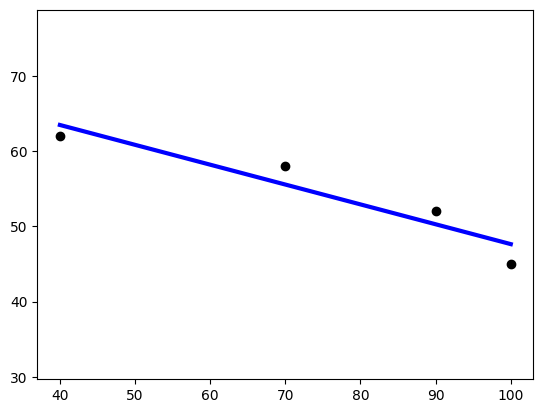

[48.96428571 51.60714286 54.25       56.89285714 59.53571429 62.17857143
 64.82142857 67.46428571 70.10714286]


In [13]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# ingresar datos de entrenamiento
x = np.array([100, 90, 70, 40]).reshape(-1, 1)
y = np.array([45, 52, 58, 62])

# entrenar el modelo y predecir
model = linear_model.LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

# graficar datos y predicción
plt.scatter(x, y,  color='black')
plt.axis("equal")
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.show()
x_new = np.array([95,85,75,65,55,45,35,25,15]).reshape(-1,1)
print(model.predict(x_new))

RMSE:  5.955433342649105e-14
R2:  1.0


Text(0, 0.5, 'y')

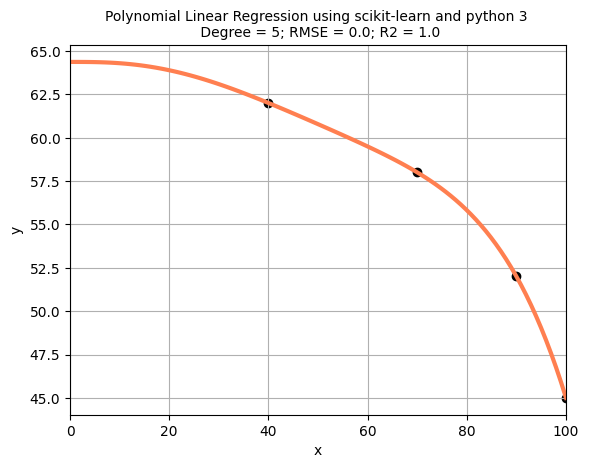

In [19]:
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

x = np.array([100, 90, 70, 40]).reshape(-1, 1)
y = np.array([45, 52, 58, 62])
nb_degree = 5
polynomial_features = PolynomialFeatures(degree = nb_degree)
X_TRANSF = polynomial_features.fit_transform(x)

model = linear_model.LinearRegression()
model.fit(X_TRANSF, y)
Y_NEW = model.predict(X_TRANSF)
rmse = np.sqrt(mean_squared_error(y,Y_NEW))
r2 = r2_score(y,Y_NEW)
print('RMSE: ', rmse)
print('R2: ', r2)

x_new_min = 0
x_new_max = 100

X_NEW = np.linspace(x_new_min, x_new_max,100)
X_NEW = X_NEW[:,np.newaxis]
X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)

Y_NEW = model.predict(X_NEW_TRANSF)
plt.scatter(x, y,  color='black')
plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)
plt.grid()
plt.xlim(x_new_min,x_new_max)
title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), 
                                                 round(r2,2))
plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " +
          title, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')